In [2]:
from google.colab import drive # remove the cell if not using colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
base_path = Path('/content/drive/MyDrive/Colab Notebooks/zadanie 1/') # change path here!

# Klasyfikacja pasa≈ºer√≥w Titanica
Po wys≈Çaniu raportu pozosta≈Ço ju≈º tylko czekaƒá. Dni mija≈Çy, ale w ko≈Ñcu telefon zadzwoni≈Ç. Okaza≈Ço siƒô, ≈ºe po konsultacji Twojego raportu z najbardziej do≈õwiadczonymi specjalistami w dziedzinie, zleceniodawca zdecydowa≈Ç siƒô powierzyƒá Ci dalszƒÖ czƒô≈õƒá tajemniczego zadania. Chodzi oczywi≈õcie o... **stworzenie modelu przewidujƒÖcego szanse prze≈ºycia katastrofy Titanica**.


#### Twoim celem bƒôdzie jest wytrenowanie modeli do klasyfikacji ka≈ºdego pasa≈ºera Titanica jako ofiary (0) lub osoby, kt√≥ra prze≈ºy≈Ça (1).

Poni≈ºej znajdziesz pytania, kt√≥re mogƒÖ byƒá pomocne w zadaniu:

- Czego nauczy≈Ço Ciƒô o badanym zbiorze danych poprzednie zadanie? Jak mo≈ºesz wykorzystaƒá wyciƒÖgniƒôte z niego wnioski w procesie tworzenia modelu?
- Jak przeprowadzenie standaryzacji danych mo≈ºe wp≈Çywaƒá na zachowanie modelu?
- Co m√≥j model robi i w jaki spos√≥b?
- Jak nie przetrenowaƒá wybranego modelu?
- Jaki wynik klasyfikacji mo≈ºemy uznaƒá za *dobry*?


Wymagania:
- Wypisz obserwacje z pierwszego zadania, kt√≥re pomogƒÖ Ci w tym. Co by≈Ço przydatne, a co okaza≈Ço siƒô bezu≈ºyteczne?
- [Nie doprowad≈∫](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do ~~przecieku statku~~ wycieku danych (np. nie ucz modelu na danych testowych). Nauczone modele odpal na danych treningowych i testowych - opisz uzyskane wyniki.
- Stw√≥rz baseline, czyli dla por√≥wnania sprawd≈∫ jak z zadaniem radzi sobie [Dummy Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) (je≈õli Tw√≥j docelowy model radzi sobie gorzej - uciekaj)
- Przeprowad≈∫ badania na dw√≥ch wybranych modelach uczenia maszynowego (np. spo≈õr√≥d: drzew decyzyjnych, SVM, MLP, KNN, z gwiazdkƒÖ [XGBoost](https://xgboost.readthedocs.io/en/stable))
- W badaniach u≈ºyj wybranych metryk. Wyb√≥r uzasadnij.
- Dla ka≈ºdego modelu wybierz co najmniej dwa hiperparametry i przeprowad≈∫ badania zale≈ºno≈õci wynik√≥w metryk od warto≈õci hiperparametr√≥w. Zwizualizuj wszystko ≈Çadnie, zastan√≥w siƒô dlaczego tak mog≈Ço byƒá i wyciƒÖgnij i wypisz wnioski.
- Podsumuj przeprowadzone badania, wypisz wnioski.

Niezmiennie, zadbaj o czytelno≈õƒá kodu i nazewnictwo zmiennych. Je≈õli jaki≈õ wycinek kodu siƒô powtarza, to wyodrƒôbnij go do funkcji. Postaraj siƒô zamieszczaƒá swoje wnioski w postaci komentarza `Markdown`.

Je≈õli chcesz, mo≈ºesz sprawdziƒá (przyjmujƒÖc pewne za≈Ço≈ºenia), jakie by≈Çyby Twoje szanse na Titanicu.

Uwaga! Je≈õli Titanic to dla Ciebie nic i baaaaardzo chcesz to mo≈ºesz w ramach tego zadania zajƒÖƒá siƒô [bardziej wymagajƒÖcym](https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data) zbiorem.

In [4]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

In [5]:
titanic_df['Cabin'].str[0].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

W poprzednim zadaniu jako≈õ mi umknƒô≈Ço przystowanie danych do modelu i zajƒÖ≈Çem siƒô jedynie badaniem prze≈ºycia pasa≈ºer√≥w(nie wiem jak) wiƒôc zaczne od tego.

In [6]:
print("Liczba brak√≥w danych w ka≈ºdej kolumnie:")
print(titanic_df.isna().sum())

Liczba brak√≥w danych w ka≈ºdej kolumnie:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare         98
Cabin       687
Embarked      2
dtype: int64


 Z poprzedniego zadania wiem ≈ºe wype≈Çnienie kolumny Age za pomocƒÖ mediany by≈Ço b≈Çƒôdnym podej≈õciem wiƒôc zastosuje innƒÖ metodƒô. Wyodrƒôbnie tytu≈Çy poszczeg√≥lnych os√≥b i zastosujƒô mediane wieku dla os√≥b z nieznanym wiekiam na podstawie ich tytu≈Çu (mam nadzieje ≈ºe to co napisa≈Çem ma sens).

In [7]:
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(titanic_df['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


Mamy parƒô "dziwnych" tytu≈Ç√≥w wiƒôc je uog√≥lnie.


In [8]:
titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'Countess', 'Sir', 'Jonkheer', 'Dona', 'Don'], 'Royal')
titanic_df['Title'] = titanic_df['Title'].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev'], 'Officer')
titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')
print(titanic_df['Title'].value_counts())

Title
Mr         517
Miss       185
Mrs        126
Master      40
Officer     18
Royal        5
Name: count, dtype: int64


In [9]:
missing_age_by_title = titanic_df.groupby('Title')['Age'].apply(lambda x: x.isna().sum())

print("Liczba brak√≥w danych w kolumnie 'Age' dla ka≈ºdego tytu≈Çu (przed uzupe≈Çnieniem):")
print(missing_age_by_title)

Liczba brak√≥w danych w kolumnie 'Age' dla ka≈ºdego tytu≈Çu (przed uzupe≈Çnieniem):
Title
Master       4
Miss        36
Mr         119
Mrs         17
Officer      1
Royal        0
Name: Age, dtype: int64


Wykres dystrybucji wieku przed uzupe≈Çnieniem danych

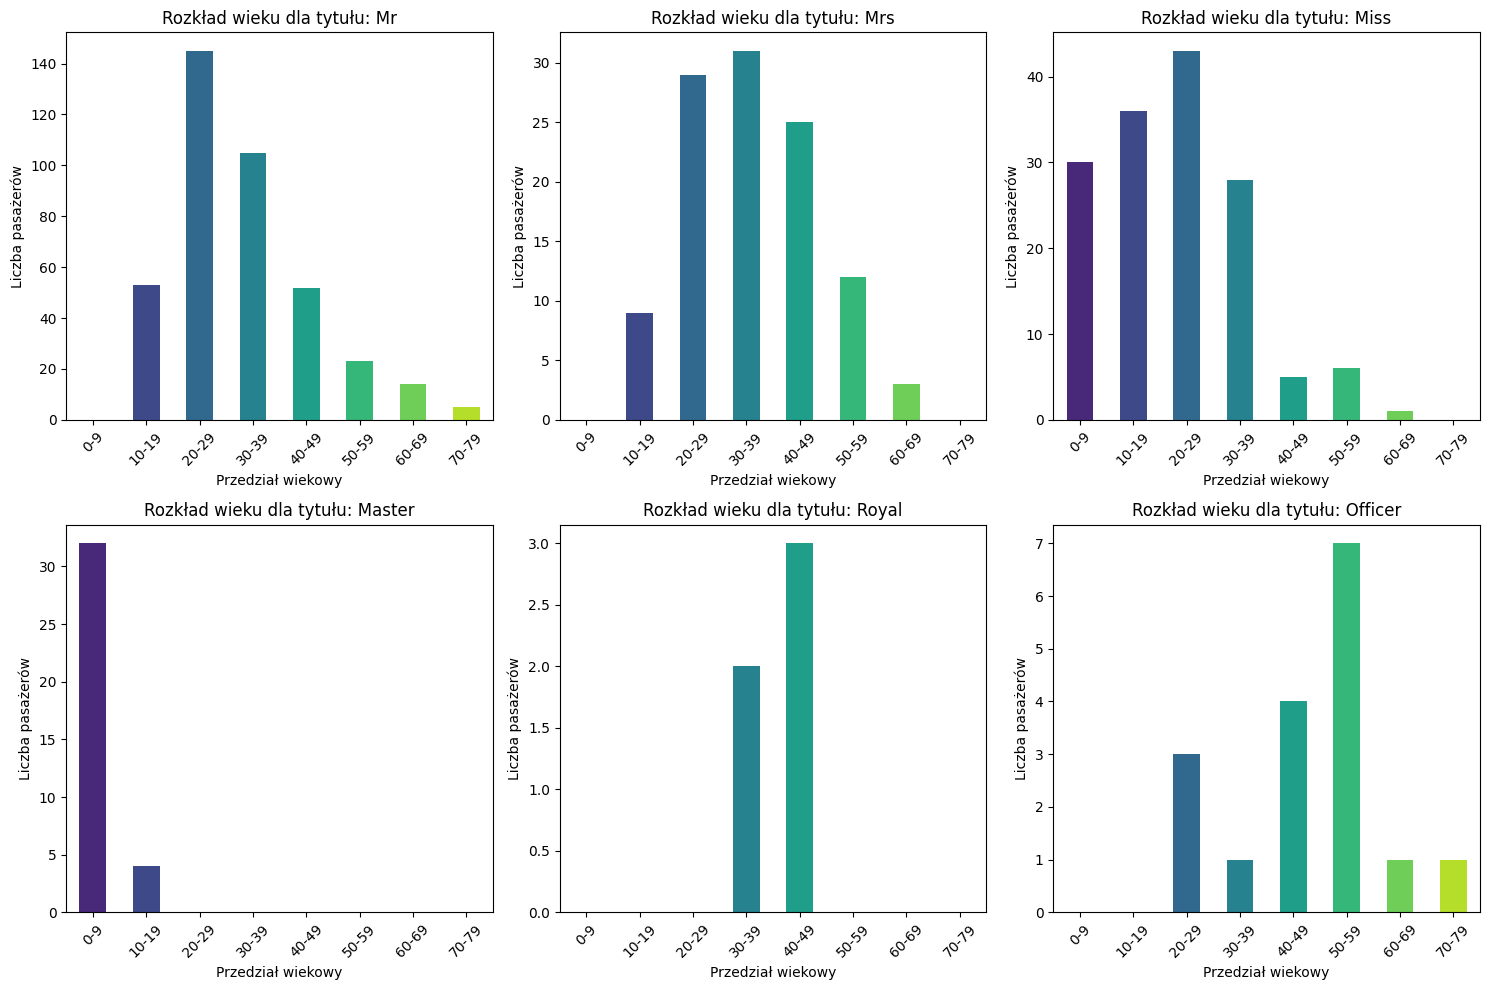

In [10]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = [f'{i}-{i+9}' for i in age_bins[:-1]]

titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels, right=False)

unique_titles = titanic_df['Title'].unique()

n_titles = len(unique_titles)
n_cols = 3
n_rows = (n_titles + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, title in enumerate(unique_titles):
    title_data = titanic_df[titanic_df['Title'] == title]

    age_group_counts = title_data['AgeGroup'].value_counts().sort_index()

    age_group_counts.plot(kind='bar', ax=axes[i], color=sns.color_palette("viridis", len(age_group_counts)))

    axes[i].set_title(f'Rozk≈Çad wieku dla tytu≈Çu: {title}')
    axes[i].set_xlabel('Przedzia≈Ç wiekowy')
    axes[i].set_ylabel('Liczba pasa≈ºer√≥w')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [11]:
median_age_by_title = titanic_df.groupby('Title')['Age'].median()

def impute_age(row):
    if pd.isna(row['Age']):
        return median_age_by_title[row['Title']]
    return row['Age']

titanic_df['Age'] = titanic_df.apply(impute_age, axis=1)

print("Liczba brak√≥w danych w kolumnie 'Age' po uzupe≈Çnieniu:")
print(titanic_df['Age'].isna().sum())

Liczba brak√≥w danych w kolumnie 'Age' po uzupe≈Çnieniu:
0


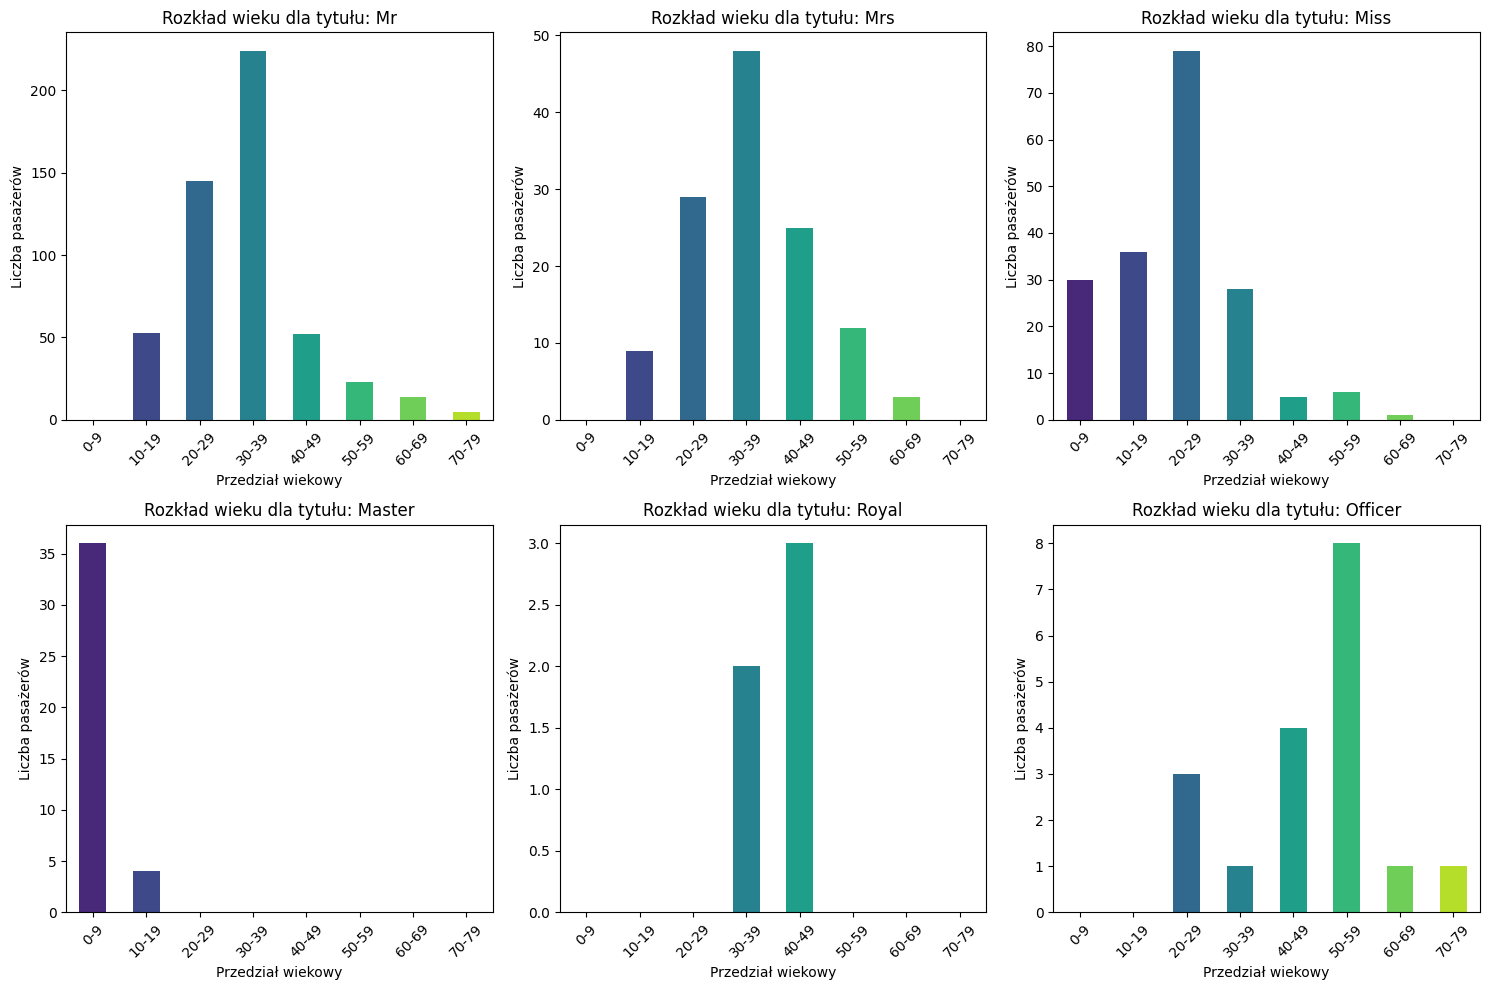

In [12]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = [f'{i}-{i+9}' for i in age_bins[:-1]]

titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels, right=False)

unique_titles = titanic_df['Title'].unique()

n_titles = len(unique_titles)
n_cols = 3
n_rows = (n_titles + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, title in enumerate(unique_titles):
    title_data = titanic_df[titanic_df['Title'] == title]

    age_group_counts = title_data['AgeGroup'].value_counts().sort_index()

    age_group_counts.plot(kind='bar', ax=axes[i], color=sns.color_palette("viridis", len(age_group_counts)))

    axes[i].set_title(f'Rozk≈Çad wieku dla tytu≈Çu: {title}')
    axes[i].set_xlabel('Przedzia≈Ç wiekowy')
    axes[i].set_ylabel('Liczba pasa≈ºer√≥w')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

titanic_df.drop('AgeGroup', axis=1, inplace=True)

Dla danych wystepujƒÖ teraz piki dla poszczeg√≥lnych grup wiekowych, ale nie mam lepszego pomys≈Çu jak je uzupe≈Çniƒá na ten moment.

In [13]:
print("Liczba brak√≥w danych w ka≈ºdej kolumnie:")
print(titanic_df.isna().sum())

Liczba brak√≥w danych w ka≈ºdej kolumnie:
Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare         98
Cabin       687
Embarked      2
Title         0
dtype: int64


Zmienna Fare uzupe≈Çnie w podobny spos√≥b co Age. tylko zamiast tytu≈Çu grupowaƒá bƒôdƒô klasƒÖ.

In [14]:
median_fare_by_pclass = titanic_df.groupby('Pclass')['Fare'].median()

def impute_fare(row):
    if pd.isna(row['Fare']):
        return median_fare_by_pclass[row['Pclass']]
    return row['Fare']

titanic_df['Fare'] = titanic_df.apply(impute_fare, axis=1)

print("Liczba brak√≥w danych w kolumnie 'Fare' po uzupe≈Çnieniu:")
print(titanic_df['Fare'].isna().sum())

Liczba brak√≥w danych w kolumnie 'Fare' po uzupe≈Çnieniu:
0


Kolumna Cabin zawiera za du≈ºo brak√≥w wiƒôc jƒÖ po prostu usunƒô

In [15]:
titanic_df.drop('Cabin', axis=1, inplace=True)
print("Liczba brak√≥w danych w ka≈ºdej kolumnie:")
print(titanic_df.isna().sum())

Liczba brak√≥w danych w ka≈ºdej kolumnie:
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
Title       0
dtype: int64


Kolumne Embarked uzupe≈Çnie modƒÖ

In [16]:
mode_embarked = titanic_df['Embarked'].mode()[0]

titanic_df['Embarked'] = titanic_df['Embarked'].fillna(mode_embarked)

print("Liczba brak√≥w danych w kolumnie 'Embarked' po uzupe≈Çnieniu:")
print(titanic_df['Embarked'].isna().sum())

Liczba brak√≥w danych w kolumnie 'Embarked' po uzupe≈Çnieniu:
0


Dodatkowo utworzƒô kolumnƒô FamilySize kt√≥ra sumuje SibSp i Parch

In [17]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
print("Liczba brak√≥w danych w ka≈ºdej kolumnie:")
print(titanic_df.isna().sum())

Liczba brak√≥w danych w ka≈ºdej kolumnie:
Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
Title         0
FamilySize    0
dtype: int64


Po uzupe≈Çnieniu danych muszƒô je przekszta≈Çciƒá na warto≈õci liczbowe dla modelu nie bƒôdzie mia≈Ço znacznie ani kategoria Name ani Ticket wiƒôc moge je usunƒÖƒá

In [18]:
titanic_df.drop('Name', axis=1, inplace=True)
titanic_df.drop('Ticket', axis=1, inplace=True)

In [19]:
categorical_cols = ['Sex', 'Embarked', 'Title', 'Pclass']

titanic_df_encoded = pd.get_dummies(titanic_df, columns=categorical_cols, drop_first=True)

print(titanic_df_encoded.head())

             Survived   Age  SibSp  Parch     Fare  FamilySize  Sex_male  \
PassengerId                                                                
1                   0  22.0      1      0   7.2500           2      True   
2                   1  38.0      1      0  71.2833           2     False   
3                   1  26.0      0      0   7.9250           1     False   
4                   1  35.0      1      0  53.1000           2     False   
5                   0  35.0      0      0   8.0500           1      True   

             Embarked_Q  Embarked_S  Title_Miss  Title_Mr  Title_Mrs  \
PassengerId                                                            
1                 False        True       False      True      False   
2                 False       False       False     False       True   
3                 False        True        True     False      False   
4                 False        True       False     False       True   
5                 False        True

Po przystosowaniu danych mogƒô przej≈õƒá do trenowaniu modelu


Pierwszym krokiem bƒôdzi podzia≈Ç danych na testowe i treningowe.

In [20]:
from sklearn.model_selection import train_test_split

X = titanic_df_encoded.drop('Survived', axis=1)
y = titanic_df_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Kszta≈Çt zbioru treningowego (X_train):", X_train.shape)
print("Kszta≈Çt zbioru testowego (X_test):", X_test.shape)
print("Kszta≈Çt zbioru treningowego (y_train):", y_train.shape)
print("Kszta≈Çt zbioru testowego (y_test):", y_test.shape)

Kszta≈Çt zbioru treningowego (X_train): (712, 15)
Kszta≈Çt zbioru testowego (X_test): (179, 15)
Kszta≈Çt zbioru treningowego (y_train): (712,)
Kszta≈Çt zbioru testowego (y_test): (179,)


In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

y_train_pred_dummy = dummy_clf.predict(X_train)
y_test_pred_dummy = dummy_clf.predict(X_test)

print("Metryki dla Dummy Classifier (zbi√≥r treningowy):")
print("Accuracy:", accuracy_score(y_train, y_train_pred_dummy))
print("Precision:", precision_score(y_train, y_train_pred_dummy, zero_division=0.0))
print("Recall:", recall_score(y_train, y_train_pred_dummy, zero_division=0.0))
print("F1-Score:", f1_score(y_train, y_train_pred_dummy, zero_division=0.0))

print("\nMetryki dla Dummy Classifier (zbi√≥r testowy):")
print("Accuracy:", accuracy_score(y_test, y_test_pred_dummy))
print("Precision:", precision_score(y_test, y_test_pred_dummy, zero_division=0.0))
print("Recall:", recall_score(y_test, y_test_pred_dummy, zero_division=0.0))
print("F1-Score:", f1_score(y_test, y_test_pred_dummy, zero_division=0.0))

Metryki dla Dummy Classifier (zbi√≥r treningowy):
Accuracy: 0.6235955056179775
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metryki dla Dummy Classifier (zbi√≥r testowy):
Accuracy: 0.5865921787709497
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)

dt_clf.fit(X_train, y_train)

y_train_pred_dt = dt_clf.predict(X_train)
y_test_pred_dt = dt_clf.predict(X_test)

print("Metryki dla drzewa decyzyjnego zbi√≥r treningowy")
print("Accuracy:", accuracy_score(y_train, y_train_pred_dt))
print("Precision:", precision_score(y_train, y_train_pred_dt))
print("Recall:", recall_score(y_train, y_train_pred_dt))
print("F1-Score:", f1_score(y_train, y_train_pred_dt))

print("\nMetryki dla drzewa decyzyjnego zbi√≥r testowy")
print("Accuracy:", accuracy_score(y_test, y_test_pred_dt))
print("Precision:", precision_score(y_test, y_test_pred_dt))
print("Recall:", recall_score(y_test, y_test_pred_dt))
print("F1-Score:", f1_score(y_test, y_test_pred_dt))

Metryki dla drzewa decyzyjnego zbi√≥r treningowy
Accuracy: 0.976123595505618
Precision: 0.9921568627450981
Recall: 0.9440298507462687
F1-Score: 0.9674952198852772

Metryki dla drzewa decyzyjnego zbi√≥r testowy
Accuracy: 0.7932960893854749
Precision: 0.7534246575342466
Recall: 0.7432432432432432
F1-Score: 0.7482993197278912


# Badanie hiperparamet√≥w
Teraz zbadamy wp≈Çyw wybranych hiperparametr√≥w na model Drzewa Decyzyjnego. Skupimy siƒô na max_depth i min_samples_split.


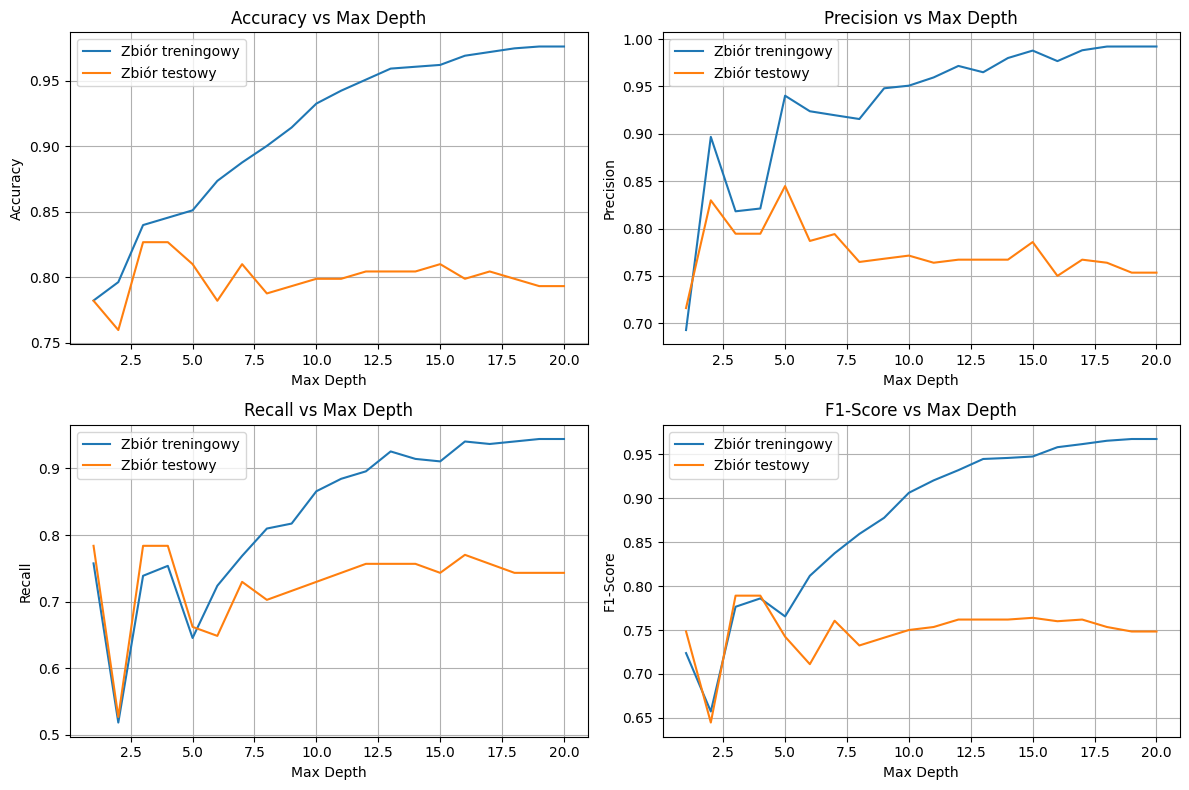

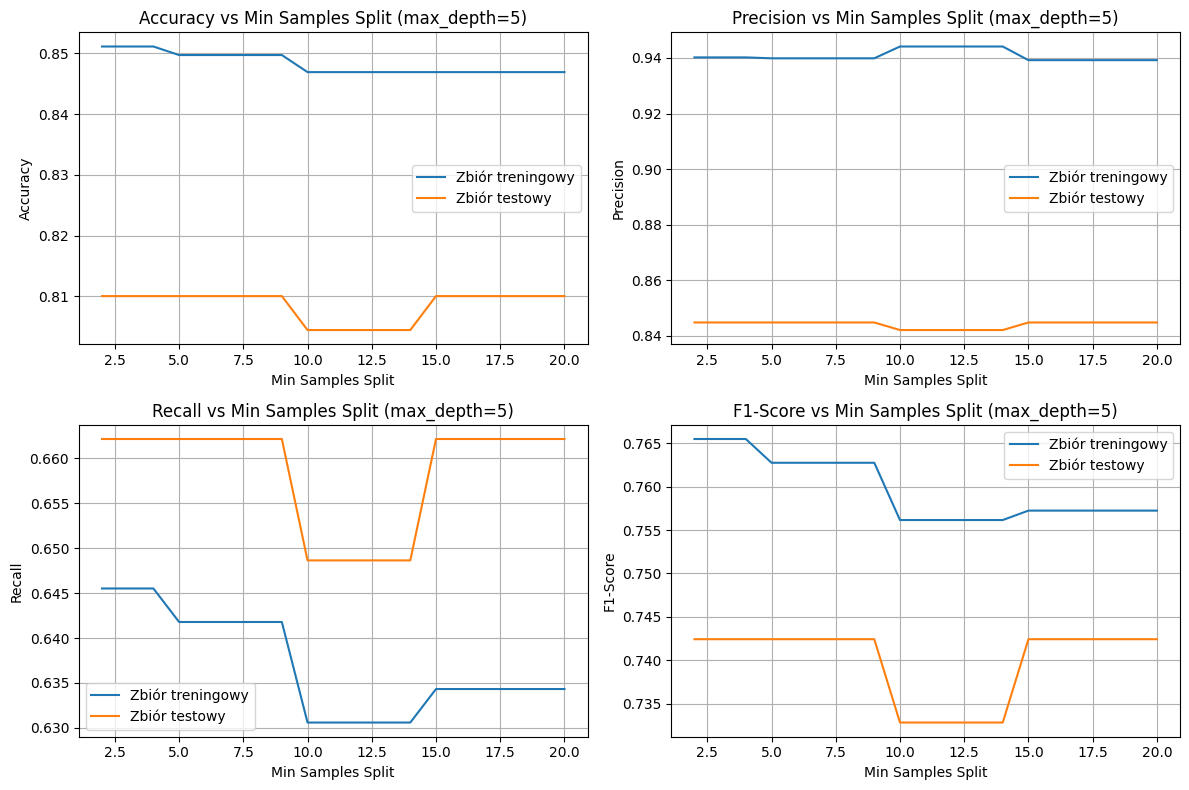

In [23]:
max_depth_values = range(1, 21)
min_samples_split_values = range(2, 21)

accuracy_train = []
accuracy_test = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
f1_train = []
f1_test = []

for depth in max_depth_values:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_clf.fit(X_train, y_train)

    y_train_pred = dt_clf.predict(X_train)
    y_test_pred = dt_clf.predict(X_test)

    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
    precision_train.append(precision_score(y_train, y_train_pred))
    precision_test.append(precision_score(y_test, y_test_pred))
    recall_train.append(recall_score(y_train, y_train_pred))
    recall_test.append(recall_score(y_test, y_test_pred))
    f1_train.append(f1_score(y_train, y_train_pred))
    f1_test.append(f1_score(y_test, y_test_pred))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(max_depth_values, accuracy_train, label='Zbi√≥r treningowy')
plt.plot(max_depth_values, accuracy_test, label='Zbi√≥r testowy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(max_depth_values, precision_train, label='Zbi√≥r treningowy')
plt.plot(max_depth_values, precision_test, label='Zbi√≥r testowy')
plt.xlabel('Max Depth')
plt.ylabel('Precision')
plt.title('Precision vs Max Depth')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(max_depth_values, recall_train, label='Zbi√≥r treningowy')
plt.plot(max_depth_values, recall_test, label='Zbi√≥r testowy')
plt.xlabel('Max Depth')
plt.ylabel('Recall')
plt.title('Recall vs Max Depth')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(max_depth_values, f1_train, label='Zbi√≥r treningowy')
plt.plot(max_depth_values, f1_test, label='Zbi√≥r testowy')
plt.xlabel('Max Depth')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Max Depth')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


accuracy_train_split = []
accuracy_test_split = []
precision_train_split = []
precision_test_split = []
recall_train_split = []
recall_test_split = []
f1_train_split = []
f1_test_split = []

for samples_split in min_samples_split_values:
    dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=samples_split, random_state=42)
    dt_clf.fit(X_train, y_train)

    y_train_pred = dt_clf.predict(X_train)
    y_test_pred = dt_clf.predict(X_test)

    accuracy_train_split.append(accuracy_score(y_train, y_train_pred))
    accuracy_test_split.append(accuracy_score(y_test, y_test_pred))
    precision_train_split.append(precision_score(y_train, y_train_pred))
    precision_test_split.append(precision_score(y_test, y_test_pred))
    recall_train_split.append(recall_score(y_train, y_train_pred))
    recall_test_split.append(recall_score(y_test, y_test_pred))
    f1_train_split.append(f1_score(y_train, y_train_pred))
    f1_test_split.append(f1_score(y_test, y_test_pred))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(min_samples_split_values, accuracy_train_split, label='Zbi√≥r treningowy')
plt.plot(min_samples_split_values, accuracy_test_split, label='Zbi√≥r testowy')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Min Samples Split (max_depth=5)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(min_samples_split_values, precision_train_split, label='Zbi√≥r treningowy')
plt.plot(min_samples_split_values, precision_test_split, label='Zbi√≥r testowy')
plt.xlabel('Min Samples Split')
plt.ylabel('Precision')
plt.title('Precision vs Min Samples Split (max_depth=5)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(min_samples_split_values, recall_train_split, label='Zbi√≥r treningowy')
plt.plot(min_samples_split_values, recall_test_split, label='Zbi√≥r testowy')
plt.xlabel('Min Samples Split')
plt.ylabel('Recall')
plt.title('Recall vs Min Samples Split (max_depth=5)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(min_samples_split_values, f1_train_split, label='Zbi√≥r treningowy')
plt.plot(min_samples_split_values, f1_test_split, label='Zbi√≥r testowy')
plt.xlabel('Min Samples Split')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Min Samples Split (max_depth=5)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Max Depth


1.   **Zbi√≥r treningowy**

* Dok≈Çadno≈õƒá ciƒÖgle ro≈õnie wraz ze wzrostem g≈Çeboko≈õci. Jest to spowodowane uczeniem siƒô na tych w k√≥≈Çko na tym samym zbiorze danych co prowadzi ≈ºe model praktycznie zapamiƒôtuje czy dany pasa≈ºer prze≈ºyje, dlatego dla g≈Çƒôboko≈õci wiƒôkszych ni≈º 12 model prawie siƒô nie myli.
*  Wykresy dla Precision, Recall i F1-Score pokazujƒÖ podobny trend. Wyniki na zbiorze treningowym rosnƒÖ lub stabilizujƒÖ siƒô na bardzo wysokim poziomie.
2.   **Zbi√≥r testowy**
* Dok≈Çadno≈õƒá na zbiorze testowym zachowuje siƒô inaczej. PoczƒÖtkowo, gdy zwiƒôkszamy g≈Çƒôboko≈õƒá z 1 do oko≈Ço 4-6, dok≈Çadno≈õƒá na zbiorze testowym r√≥wnie≈º ro≈õnie. Drzewo o wiƒôkszej g≈Çƒôboko≈õci jest w stanie uchwyciƒá bardziej z≈Ço≈ºone zale≈ºno≈õci w danych, co poprawia jego zdolno≈õƒá przewidywania na nowych danych. Jednak po osiƒÖgniƒôciu optymalnej g≈Çƒôboko≈õci, dok≈Çadno≈õƒá przestaje rosnƒÖƒá lub nawet lekko spada, mimo ≈ºe dok≈Çadno≈õƒá na zbiorze treningowym dalej ro≈õnie.
* Reszta metryk zachowuje sie w podobny spos√≥b (nie wiem z czego za to wynika spadek przy recall na g≈Çeboko≈õci ~2 ü§∑‚Äç‚ôÇ)
3. **Wnioski**
* Gdy max_depth jest ma≈Çe, model jest zbyt prosty. Nie jest w stanie uchwyciƒá wszystkich wa≈ºnych wzorc√≥w w danych, dlatego s≈Çabo radzi sobie zar√≥wno na zbiorze treningowym, jak i testowym.
* Wraz ze wzrostem max_depth, model staje siƒô bardziej z≈Ço≈ºony i lepiej uczy siƒô wzorc√≥w. Wyniki poprawiajƒÖ siƒô na obu zbiorach.
* Gdy max_depth staje siƒô zbyt du≈ºe, model staje siƒô zbyt z≈Ço≈ºony. Zaczyna dopasowywaƒá siƒô nie tylko do rzeczywistych wzorc√≥w w danych treningowych, ale tak≈ºe do losowego szumu i specyficznych cech, kt√≥re wystƒôpujƒÖ tylko w tym konkretnym zbiorze treningowym.

# Min Samples Split
1. Zbi√≥r treningowy
* PatrzƒÖc na wykresy dla Accuracy, Precision, Recall i F1-Score, widzimy, ≈ºe metryki na zbiorze treningowym sƒÖ wzglƒôdnie stabilne w ca≈Çym badanym zakresie warto≈õci min_samples_split (od 2 do 20).
2. Zbi√≥r testowy
* Metryki na zbiorze testowym r√≥wnie≈º sƒÖ wzglƒôdnie stabilne w ca≈Çym badanym zakresie min_samples_split.
3. Wnioski
* W badanym zakresie warto≈õci (od 2 do 20), hiperparametr min_samples_split ma ograniczony wp≈Çyw na wydajno≈õƒá modelu Drzewa Decyzyjnego, gdy max_depth jest ustawione na 5.
* Wydaje siƒô, ≈ºe w tym konkretnym przypadku i przy tej ustalonej g≈Çƒôboko≈õci, zmiana minimalnej liczby pr√≥bek wymaganej do podzia≈Çu wƒôz≈Ça nie powoduje znaczƒÖcego przetrenowania ani niedouczenia

# Model MLP

### Standaryzacja danych dla modelu MLP
Przeskalujem dane, aby mia≈Çy ≈õredniƒÖ 0 i odchylenie standardowe 1.


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("Kszta≈Çt przeskalowanego zbioru treningowego:", X_train_scaled.shape)
print("Kszta≈Çt przeskalowanego zbioru testowego:", X_test_scaled.shape)

print("\n≈örednia przeskalowanego zbioru treningowego:", X_train_scaled.mean(axis=0)[:5])
print("Odchylenie standardowe przeskalowanego zbioru treningowego:", X_train_scaled.std(axis=0)[:5])

Kszta≈Çt przeskalowanego zbioru treningowego: (712, 15)
Kszta≈Çt przeskalowanego zbioru testowego: (179, 15)

≈örednia przeskalowanego zbioru treningowego: [ 9.23106785e-17  1.74641824e-17  2.24539488e-17 -5.86297552e-17
 -4.98976640e-17]
Odchylenie standardowe przeskalowanego zbioru treningowego: [1. 1. 1. 1. 1.]


Teraz mo≈ºemy wytrenowaƒá model MLP



In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


mlp_clf_scaled = MLPClassifier(random_state=42, max_iter=1000)

mlp_clf_scaled.fit(X_train_scaled, y_train)

y_train_pred_mlp_scaled = mlp_clf_scaled.predict(X_train_scaled)
y_test_pred_mlp_scaled = mlp_clf_scaled.predict(X_test_scaled)

print("Metryki dla MLP Classifier zbi√≥r treningowy - przeskalowany")
print("Accuracy:", accuracy_score(y_train, y_train_pred_mlp_scaled))
print("Precision:", precision_score(y_train, y_train_pred_mlp_scaled))
print("Recall:", recall_score(y_train, y_train_pred_mlp_scaled))
print("F1-Score:", f1_score(y_train, y_train_pred_mlp_scaled))

print("\nMetryki dla MLP Classifier zbi√≥r testowy - przeskalowany")
print("Accuracy:", accuracy_score(y_test, y_test_pred_mlp_scaled))
print("Precision:", precision_score(y_test, y_test_pred_mlp_scaled))
print("Recall:", recall_score(y_test, y_test_pred_mlp_scaled))
print("F1-Score:", f1_score(y_test, y_test_pred_mlp_scaled))

Metryki dla MLP Classifier zbi√≥r treningowy - przeskalowany
Accuracy: 0.8778089887640449
Precision: 0.91324200913242
Recall: 0.746268656716418
F1-Score: 0.8213552361396304

Metryki dla MLP Classifier zbi√≥r testowy - przeskalowany
Accuracy: 0.7988826815642458
Precision: 0.7714285714285715
Recall: 0.7297297297297297
F1-Score: 0.75


# Badanie hiperparametr√≥w


# Badanie hiperparametr√≥w modelu MLP
Zbadamy wp≈Çyw max_iter i learning_rate_init na wydajno≈õƒá modelu MLP na przeskalowanych danych.
* max_iter: okre≈õla, ile razy ca≈Çy zbi√≥r treningowy zostanie przejrzany przez algorytm optymalizacyjny w celu aktualizacji wag sieci.
* learing_rate_init: okre≈õla jak du≈ºy krok wykonuje algorytm optymalizacyjny przy ka≈ºdej aktualizacji wag sieci podczas treningu. Jest to poczƒÖtkowa warto≈õƒá tempa uczenia.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(


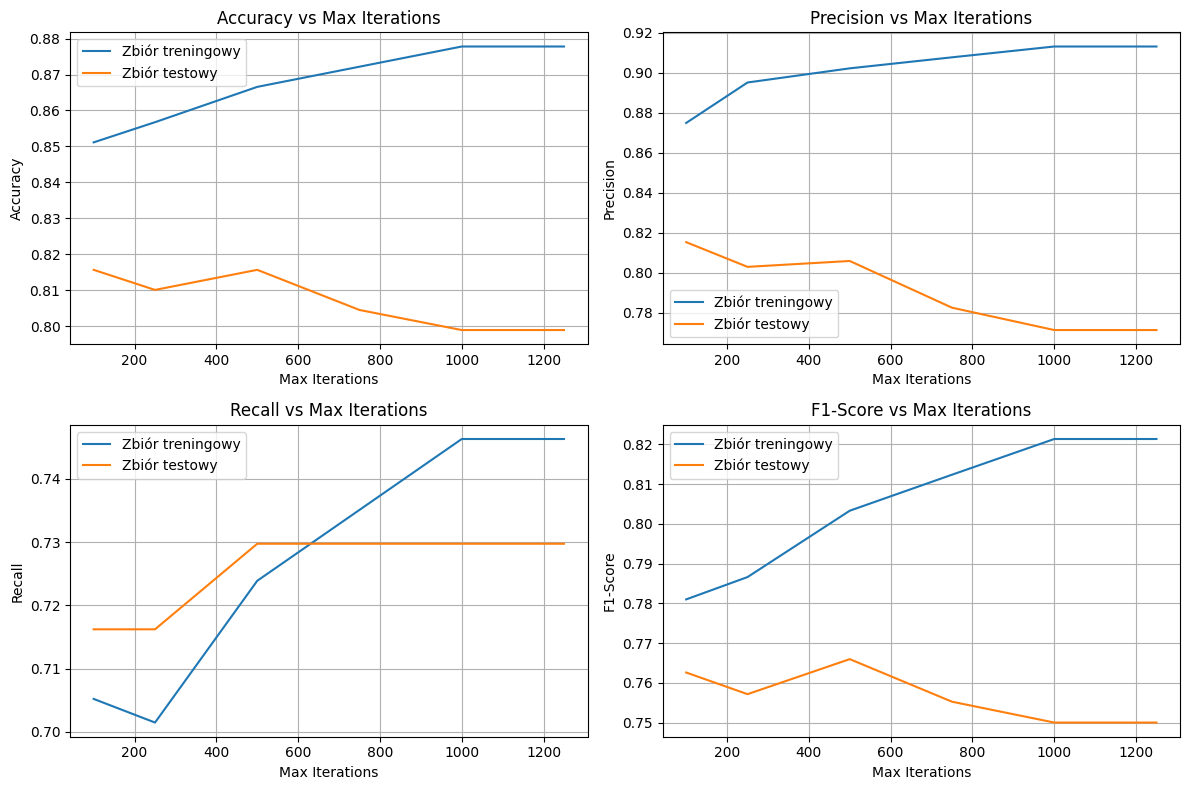

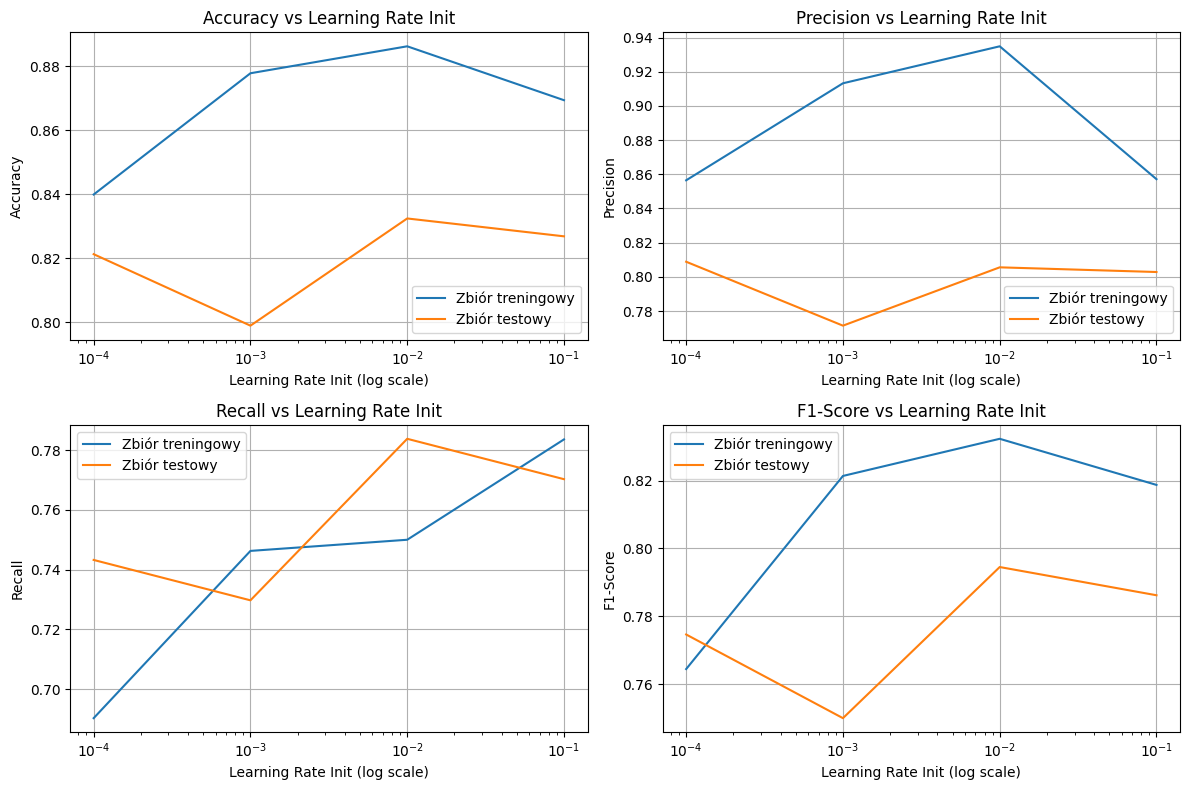

In [28]:
max_iter_values = [100, 250, 500, 750, 1000, 1250]
learning_rate_init_values = [0.0001, 0.001, 0.01, 0.1]

fixed_learning_rate = 0.001
fixed_max_iter = 1000

accuracy_train_iter = []
accuracy_test_iter = []
precision_train_iter = []
precision_test_iter = []
recall_train_iter = []
recall_test_iter = []
f1_train_iter = []
f1_test_iter = []

for iter_count in max_iter_values:
    mlp_clf = MLPClassifier(random_state=42, max_iter=iter_count, learning_rate_init=fixed_learning_rate)
    mlp_clf.fit(X_train_scaled, y_train)

    y_train_pred = mlp_clf.predict(X_train_scaled)
    y_test_pred = mlp_clf.predict(X_test_scaled)

    accuracy_train_iter.append(accuracy_score(y_train, y_train_pred))
    accuracy_test_iter.append(accuracy_score(y_test, y_test_pred))
    precision_train_iter.append(precision_score(y_train, y_train_pred))
    precision_test_iter.append(precision_score(y_test, y_test_pred))
    recall_train_iter.append(recall_score(y_train, y_train_pred))
    recall_test_iter.append(recall_score(y_test, y_test_pred))
    f1_train_iter.append(f1_score(y_train, y_train_pred))
    f1_test_iter.append(f1_score(y_test, y_test_pred))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(max_iter_values, accuracy_train_iter, label='Zbi√≥r treningowy')
plt.plot(max_iter_values, accuracy_test_iter, label='Zbi√≥r testowy')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Iterations')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(max_iter_values, precision_train_iter, label='Zbi√≥r treningowy')
plt.plot(max_iter_values, precision_test_iter, label='Zbi√≥r testowy')
plt.xlabel('Max Iterations')
plt.ylabel('Precision')
plt.title('Precision vs Max Iterations')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(max_iter_values, recall_train_iter, label='Zbi√≥r treningowy')
plt.plot(max_iter_values, recall_test_iter, label='Zbi√≥r testowy')
plt.xlabel('Max Iterations')
plt.ylabel('Recall')
plt.title('Recall vs Max Iterations')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(max_iter_values, f1_train_iter, label='Zbi√≥r treningowy')
plt.plot(max_iter_values, f1_test_iter, label='Zbi√≥r testowy')
plt.xlabel('Max Iterations')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Max Iterations')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


accuracy_train_lr = []
accuracy_test_lr = []
precision_train_lr = []
precision_test_lr = []
recall_train_lr = []
recall_test_lr = []
f1_train_lr = []
f1_test_lr = []

for lr in learning_rate_init_values:
    mlp_clf = MLPClassifier(random_state=42, max_iter=fixed_max_iter, learning_rate_init=lr)
    mlp_clf.fit(X_train_scaled, y_train)

    y_train_pred = mlp_clf.predict(X_train_scaled)
    y_test_pred = mlp_clf.predict(X_test_scaled)

    accuracy_train_lr.append(accuracy_score(y_train, y_train_pred))
    accuracy_test_lr.append(accuracy_score(y_test, y_test_pred))
    precision_train_lr.append(precision_score(y_train, y_train_pred))
    precision_test_lr.append(precision_score(y_test, y_test_pred))
    recall_train_lr.append(recall_score(y_train, y_train_pred))
    recall_test_lr.append(recall_score(y_test, y_test_pred))
    f1_train_lr.append(f1_score(y_train, y_train_pred))
    f1_test_lr.append(f1_score(y_test, y_test_pred))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(learning_rate_init_values, accuracy_train_lr, label='Zbi√≥r treningowy')
plt.plot(learning_rate_init_values, accuracy_test_lr, label='Zbi√≥r testowy')
plt.xscale('log')
plt.xlabel('Learning Rate Init (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Learning Rate Init')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(learning_rate_init_values, precision_train_lr, label='Zbi√≥r treningowy')
plt.plot(learning_rate_init_values, precision_test_lr, label='Zbi√≥r testowy')
plt.xscale('log')
plt.xlabel('Learning Rate Init (log scale)')
plt.ylabel('Precision')
plt.title('Precision vs Learning Rate Init')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(learning_rate_init_values, recall_train_lr, label='Zbi√≥r treningowy')
plt.plot(learning_rate_init_values, recall_test_lr, label='Zbi√≥r testowy')
plt.xscale('log')
plt.xlabel('Learning Rate Init (log scale)')
plt.ylabel('Recall')
plt.title('Recall vs Learning Rate Init')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(learning_rate_init_values, f1_train_lr, label='Zbi√≥r treningowy')
plt.plot(learning_rate_init_values, f1_test_lr, label='Zbi√≥r testowy')
plt.xscale('log')
plt.xlabel('Learning Rate Init (log scale)')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Learning Rate Init')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# max_iter

1.   Zbi√≥r treningowy
* PatrzƒÖc na wykresy Accuracy, Precision, Recall i F1-Score w funkcji max_iter dla zbioru treningowego, metryki szybko rosnƒÖ dla ma≈Çej ilo≈õci iteracji i stabilizujƒÖ siƒô po "uko≈Ñczeniu" nauki przy 1000 iteracji, ani nie rosnƒÖ ani nie malejƒÖ
2.   Zbi√≥r testowy
 * Metryki na zbiorze testowym r√≥wnie≈º rosnƒÖ lub sƒÖ stabilne od 100 do oko≈Ço 500 iteracji, natomiast po przekroczeniu ~500 iteracji metryki malejƒÖ o oko≈Ço jeden procent(lub nawet 4 w przypadku precision) co mo≈ºe sugerowaƒá przeƒáwiczenie modelu.
 3. Wnioski
 * ZaskakujƒÖco(dla mnie) model osiƒÖga lepsze wyniki, kiedy nie jest w pe≈Çnie wytrenowany

# learing_rate_init
1.   Zbi√≥r treningowy
* PatrzƒÖc na wykresy (Accuracy, Precision, Recall, F1) dla zbioru treningowego, metryki rosnƒÖ znaczƒÖco od najmniejszej warto≈õci 0.0001 do warto≈õci 0.001 i 0.01. Dla warto≈õci 0.1 metryki spadajƒÖ.
* Zbyt niskie tempo uczenia 0.0001 powoduje, ≈ºe model uczy siƒô wolno i nie osiƒÖga wysokiej wydajno≈õci na zbiorze treningowym w ciƒÖgu 1000 iteracji. Warto≈õci 0.001 i 0.01 pozwalajƒÖ modelowi skutecznie minimalizowaƒá b≈ÇƒÖd na danych treningowych. Bardzo wysokie tempo uczenia 0.1 zak≈Ç√≥ca proces optymalizacji i pogarsza dopasowanie nawet do danych treningowych.
2.   Zbi√≥r testowy
*  Metryki na zbiorze testowym malejƒÖ od 0.0001 do 0.001. Potem zn√≥w rosnƒÖ, aby osiƒÖgnƒÖƒá swoje maksimum w punkcie 0.01, by potem ponownie siƒô zmniejszyƒá.
* Zbyt niskie tempo uczenia 0.0001 skutkuje s≈ÇabƒÖ generalizacjƒÖ, poniewa≈º model nie zdƒÖ≈ºy≈Ç siƒô dobrze nauczyƒá.  0.01 wydaje siƒô byƒá optymalne dla generalizacji na nowe dane ‚Äì model uczy siƒô wystarczajƒÖco szybko i stabilnie. Bardzo wysokie tempo uczenia 0.1 prowadzi do niestabilno≈õci procesu uczenia, co skutkuje pogorszeniem wynik√≥w na zbiorze testowym
3. Wnioski
* Parametr learning_rate_init ma krytyczny wp≈Çyw na proces uczenia MLP i jego ko≈ÑcowƒÖ wydajno≈õƒá, zar√≥wno na zbiorze treningowym, jak i testowym.
* Zbyt niskie tempo uczenia 0.0001 prowadzi do niedouczenia
* Zbyt wysokie tempo uczenia 0.1 prowadzi do niestabilno≈õci procesu uczenia i pogorszenia generalizacj


# Podsumowanie
Po wytrenowaniu modeli do przewidywania prze≈ºycia pasa≈ºer√≥w Titanica, model bazowy Dummy Classifier uzyska≈Ç bardzo s≈Çabe wyniki, co by≈Ço spodziewane. Modele bardziej zawaansowane poradzi≈Çy sobie znacznie lepiej z tym zadaniem osiƒÖgajƒÖc wy≈ºsze metryki na zbiorze testowym. Oba modele wykaza≈Çy por√≥wnywalnƒÖ wydajno≈õƒá